In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

In [2]:
train = pd.read_csv("technocolabs training set.csv")

C:\Users\Alex\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (3,4,5,6,7,14,16,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1.0,20.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0.0,0.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2.0,20.0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3.0,20.0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4.0,20.0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5.0,20.0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone


In [4]:
train.describe()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,14.193084
std,5.457638,3.422025,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,5.996243
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,9.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000
75%,14.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000
max,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,23.000000


In [5]:
train.describe(include=['O'])

,session_id,track_id_clean,skip_1,skip_2,skip_3,not_skipped,hist_user_behavior_is_shuffle,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
count,167881,167880,167880,167880,167880,167880,167880,167880,167880,167880,167880,167880
unique,10001,50704,2,2,2,2,2,18,2,6,9,7
top,0_015504d1-f36f-43e3-a993-02291b70a922,t_bacf06d3-9185-4183-84ea-ff0db51475ce,False,True,True,False,False,7/15/2018,True,user_collection,fwdbtn,fwdbtn
freq,20,1427,97118,86824,108850,111996,116050,119639,136053,67430,79912,81389


In [6]:
##Data-preprocessing and EDA Part

In [7]:
train.drop_duplicates(inplace=True)
train.dropna(inplace=True)
train.shape

(167880, 21)

In [8]:
for colname in ['skip_1','skip_2','skip_3','not_skipped','hist_user_behavior_is_shuffle','premium']:
    train[colname] = train[colname].astype(int, copy=False)

In [9]:
train['skip'] = train['not_skipped'].replace({ 0 : 1, 1 : 0 })

In [10]:
train['skip'].value_counts()

1    111996
0     55884
Name: skip, dtype: int64

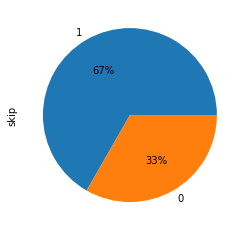

In [11]:
train['skip'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

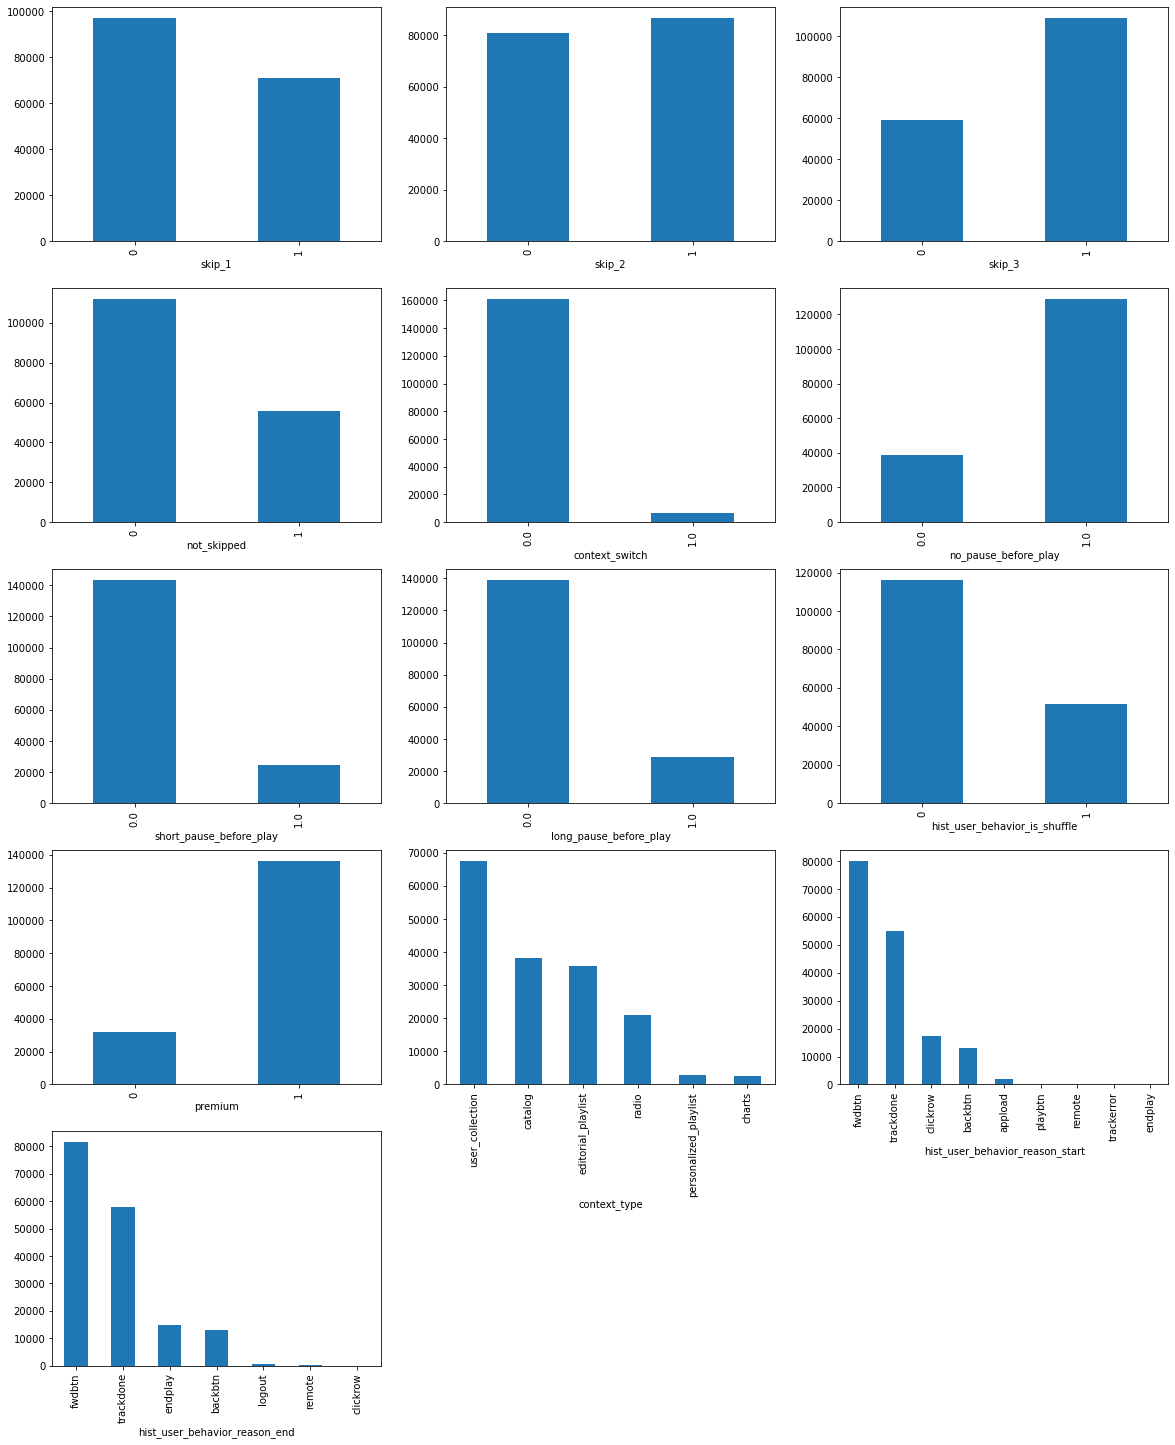

In [12]:
col = ['skip_1','skip_2','skip_3',
       'not_skipped','context_switch','no_pause_before_play',
       'short_pause_before_play','long_pause_before_play','hist_user_behavior_is_shuffle',
       'premium','context_type','hist_user_behavior_reason_start',
       'hist_user_behavior_reason_end']

plt.figure(figsize=(20,25))
n = 1
for colname in col:
    plt.subplot(5,3,n)
    train[colname].value_counts().plot(kind='bar')
    plt.xlabel(colname)
    n +=1

In [13]:
##hide unused columns

In [14]:
df = train.copy()
df.shape

(167880, 22)

In [15]:
df = df.drop(columns=['skip_1','skip_2','skip_3','not_skipped','date'])
df.shape

(167880, 17)

In [16]:
df.head()

,session_id,session_position,session_length,track_id_clean,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skip
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1.0,20.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.0,0.0,0.0,0.0,0.0,0.0,1,16.0,1,editorial_playlist,trackdone,trackdone,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2.0,20.0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0.0,1.0,0.0,0.0,0.0,0.0,1,16.0,1,editorial_playlist,trackdone,trackdone,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3.0,20.0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0.0,1.0,0.0,0.0,0.0,0.0,1,16.0,1,editorial_playlist,trackdone,trackdone,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4.0,20.0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0.0,1.0,0.0,0.0,0.0,0.0,1,16.0,1,editorial_playlist,trackdone,trackdone,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5.0,20.0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0.0,1.0,0.0,0.0,0.0,0.0,1,16.0,1,editorial_playlist,trackdone,trackdone,0


In [17]:
#Train dataset

In [18]:
df1 = df.drop(['session_id', 'track_id_clean'], axis=1)
df1.shape

(167880, 15)

In [19]:
dummy_train = pd.get_dummies(df1)
dummy_train.shape

(167880, 34)

In [20]:
dummy_train.head()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,...,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1,16.0,...,0,1,0,0,0,0,0,0,0,1
1,2.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1,16.0,...,0,1,0,0,0,0,0,0,0,1
2,3.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1,16.0,...,0,1,0,0,0,0,0,0,0,1
3,4.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1,16.0,...,0,1,0,0,0,0,0,0,0,1
4,5.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1,16.0,...,0,1,0,0,0,0,0,0,0,1


In [21]:
#Track Features

In [22]:
tf = pd.read_csv('track_feats.csv')
tf.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_7f435320-5d3b-497d-9346-0c97429af2b9,3.866097,0.441176,-0.403765,0.075846,0.499848,0.494943,0.461215,-0.208611,0.563252,...,0.571429,0.468440,1.034540,-1.040880,-1.281460,-0.375163,1.442307,0.045940,-0.443245,-0.243705
1,t_2a7b6393-ebec-4e1f-a53f-2ad842532c99,1.512969,0.308824,0.314153,0.085482,0.450139,0.457034,0.663219,-0.305010,0.767307,...,0.571429,0.655369,0.834594,-0.653568,-0.483168,-0.538935,1.247153,0.414248,-0.468285,-0.931875
2,t_949441c4-4920-4eed-b929-2d67d37b7bd9,-1.332280,0.485294,0.001032,0.002274,0.243778,0.229295,0.290262,-1.181899,0.958647,...,0.571429,0.293100,0.846650,0.123691,-2.692681,-0.770798,1.533066,-0.173705,-0.402540,1.181761
3,t_63eae5ac-744a-46ee-b719-0db8e70d6f7f,-0.712162,0.485294,0.558944,0.005024,0.338580,0.331703,0.348846,-0.795663,0.886674,...,0.571429,0.387131,0.920349,0.335177,-2.631787,-1.033223,1.549514,-0.036511,-0.488062,1.028883
4,t_a0747d21-6042-4af7-a21d-aa7cd1a8094e,-1.629474,0.573529,-0.356946,0.962717,0.130125,0.092335,0.170027,-2.024206,0.005674,...,0.428571,0.030858,2.238796,-3.259609,-2.378984,1.288895,-1.053248,-3.132837,0.946820,-0.623612


In [23]:
tf2 = pd.read_csv('track_feats.csv')
tf2.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_7f435320-5d3b-497d-9346-0c97429af2b9,3.866097,0.441176,-0.403765,0.075846,0.499848,0.494943,0.461215,-0.208611,0.563252,...,0.571429,0.468440,1.034540,-1.040880,-1.281460,-0.375163,1.442307,0.045940,-0.443245,-0.243705
1,t_2a7b6393-ebec-4e1f-a53f-2ad842532c99,1.512969,0.308824,0.314153,0.085482,0.450139,0.457034,0.663219,-0.305010,0.767307,...,0.571429,0.655369,0.834594,-0.653568,-0.483168,-0.538935,1.247153,0.414248,-0.468285,-0.931875
2,t_949441c4-4920-4eed-b929-2d67d37b7bd9,-1.332280,0.485294,0.001032,0.002274,0.243778,0.229295,0.290262,-1.181899,0.958647,...,0.571429,0.293100,0.846650,0.123691,-2.692681,-0.770798,1.533066,-0.173705,-0.402540,1.181761
3,t_63eae5ac-744a-46ee-b719-0db8e70d6f7f,-0.712162,0.485294,0.558944,0.005024,0.338580,0.331703,0.348846,-0.795663,0.886674,...,0.571429,0.387131,0.920349,0.335177,-2.631787,-1.033223,1.549514,-0.036511,-0.488062,1.028883
4,t_a0747d21-6042-4af7-a21d-aa7cd1a8094e,-1.629474,0.573529,-0.356946,0.962717,0.130125,0.092335,0.170027,-2.024206,0.005674,...,0.428571,0.030858,2.238796,-3.259609,-2.378984,1.288895,-1.053248,-3.132837,0.946820,-0.623612


In [24]:
track = pd.concat([tf, tf2])
track.shape

(633404, 30)

In [25]:
#inspecting data
track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633404 entries, 0 to 316701
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   track_id                633404 non-null  object 
 1   duration                633404 non-null  float64
 2   release_year            633404 non-null  float64
 3   us_popularity_estimate  633404 non-null  float64
 4   acousticness            633404 non-null  float64
 5   beat_strength           633404 non-null  float64
 6   bounciness              633404 non-null  float64
 7   danceability            633404 non-null  float64
 8   dyn_range_mean          633404 non-null  float64
 9   energy                  633404 non-null  float64
 10  flatness                633404 non-null  float64
 11  instrumentalness        633404 non-null  float64
 12  key                     633404 non-null  float64
 13  liveness                633404 non-null  float64
 14  loudness            

In [26]:
track.duplicated().sum()

316702

In [27]:
track.isna().sum()

track_id                  0
duration                  0
release_year              0
us_popularity_estimate    0
acousticness              0
beat_strength             0
bounciness                0
danceability              0
dyn_range_mean            0
energy                    0
flatness                  0
instrumentalness          0
key                       0
liveness                  0
loudness                  0
mechanism                 0
is_major                  0
organism                  0
speechiness               0
tempo                     0
time_signature            0
valence                   0
acoustic_vector_0         0
acoustic_vector_1         0
acoustic_vector_2         0
acoustic_vector_3         0
acoustic_vector_4         0
acoustic_vector_5         0
acoustic_vector_6         0
acoustic_vector_7         0
dtype: int64

In [28]:
track.describe()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,633404.000000,633404.000000,633404.000000,633404.000000,633404.000000,633404.000000,633404.000000,633404.000000,633404.000000,633404.000000,...,633404.000000,633404.000000,633404.000000,633404.000000,633404.000000,633404.000000,633404.000000,633404.000000,633404.000000,633404.000000
mean,0.000923,0.883444,-0.022242,0.281541,0.477372,0.497480,0.589497,-0.001272,0.632731,0.993752,...,0.556604,0.488560,0.005364,-0.006707,-0.004315,0.003672,0.002717,-0.003631,0.005902,0.000838
std,1.005990,0.165386,1.014101,0.301164,0.162313,0.188032,0.173186,1.001797,0.228166,0.048357,...,0.063584,0.256182,1.000246,1.002608,1.003723,1.001550,1.001635,1.003239,1.002117,1.002930
min,-2.359677,0.000000,-6.207444,0.000000,0.000000,0.000000,0.000000,-3.247292,0.000000,0.000000,...,0.000000,0.000000,-2.086612,-4.441997,-3.843906,-2.349572,-2.654358,-6.287599,-1.701727,-2.881315
25%,-0.524979,0.852941,-0.169545,0.024083,0.355426,0.349182,0.475606,-0.773884,0.484490,0.971236,...,0.571429,0.281569,-0.834471,-0.497211,-0.627218,-0.762370,-0.799896,-0.538957,-0.728966,-0.619602
50%,-0.105378,0.955882,0.358592,0.156679,0.476761,0.502692,0.603000,-0.095655,0.660723,1.001626,...,0.571429,0.480178,0.083995,0.224900,0.275068,0.070669,-0.238287,0.149411,-0.281970,0.141966
75%,0.375977,0.985294,0.584684,0.485538,0.594337,0.643911,0.720021,0.644244,0.815253,1.025645,...,0.571429,0.691242,0.831655,0.656089,0.715054,0.544089,0.837214,0.727948,0.521101,0.568692
max,19.108514,1.000000,0.715584,0.995796,0.987369,0.975535,0.995690,8.727326,0.999984,1.131413,...,0.714286,0.999990,2.857353,2.315441,2.176667,3.340167,2.442389,2.147237,3.135206,3.441050


In [29]:
track.describe(include='O')

,track_id
count,633404
unique,316702
top,t_e04e0bc8-3b03-465f-83fd-8b0fdf9661dc
freq,2


In [30]:
#EDA Part

In [31]:
tf[[c for c in tf.columns if tf[c].dtype != 'float64']].head()

,track_id,is_major
0,t_7f435320-5d3b-497d-9346-0c97429af2b9,1
1,t_2a7b6393-ebec-4e1f-a53f-2ad842532c99,1
2,t_949441c4-4920-4eed-b929-2d67d37b7bd9,1
3,t_63eae5ac-744a-46ee-b719-0db8e70d6f7f,1
4,t_a0747d21-6042-4af7-a21d-aa7cd1a8094e,1


C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


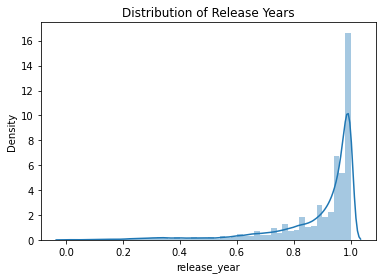

In [32]:
sns.distplot(track.release_year)
plt.title("Distribution of Release Years");

In [33]:
track['key'].unique()

array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
       0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
       0.90909091, 1.        ])

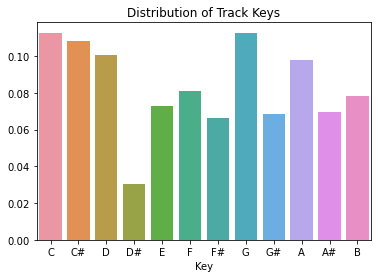

In [34]:
keys = track.key.value_counts().sort_index()
sns.barplot(
    x=[ "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"],
    y=keys.values/keys.sum()
)
plt.title("Distribution of Track Keys")
plt.xlabel("Key");

In [35]:
#Analysing numerical columns

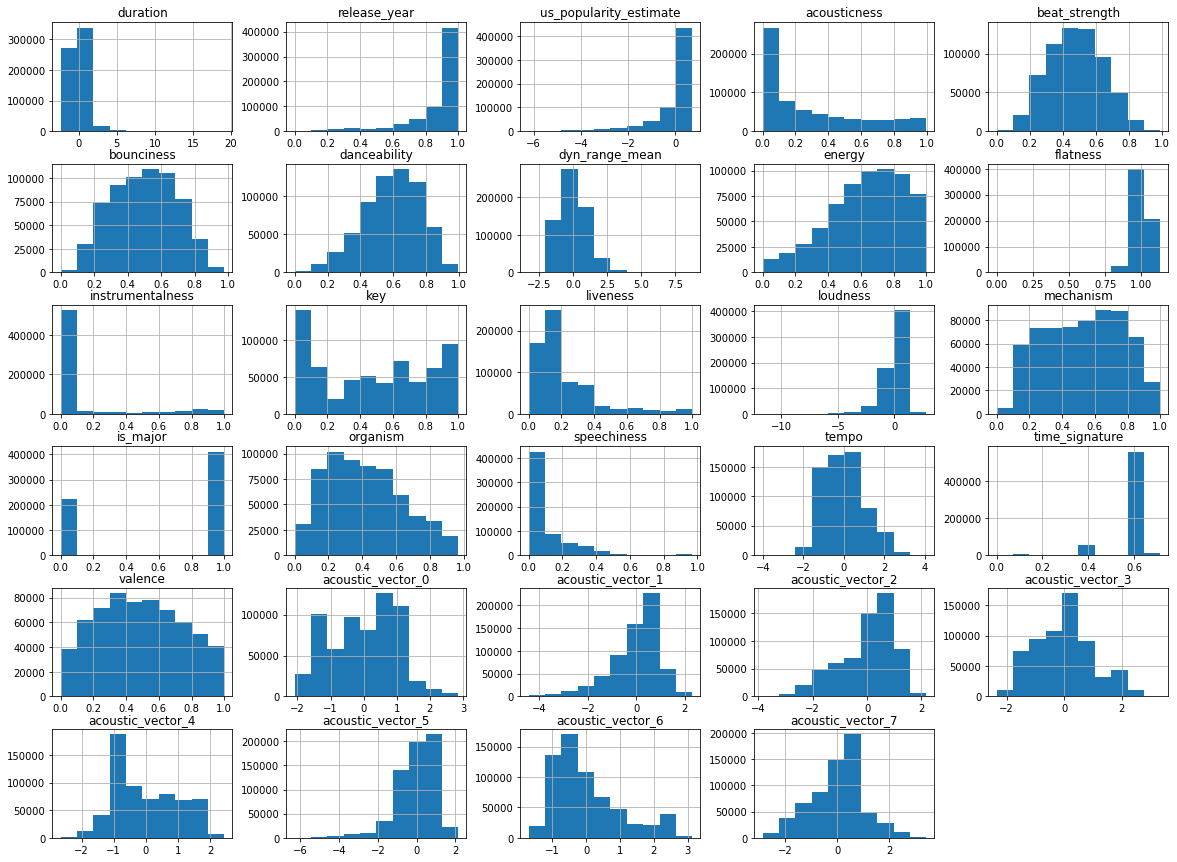

In [36]:
track.hist(figsize=(20,15));

In [37]:
#Correlation matrix

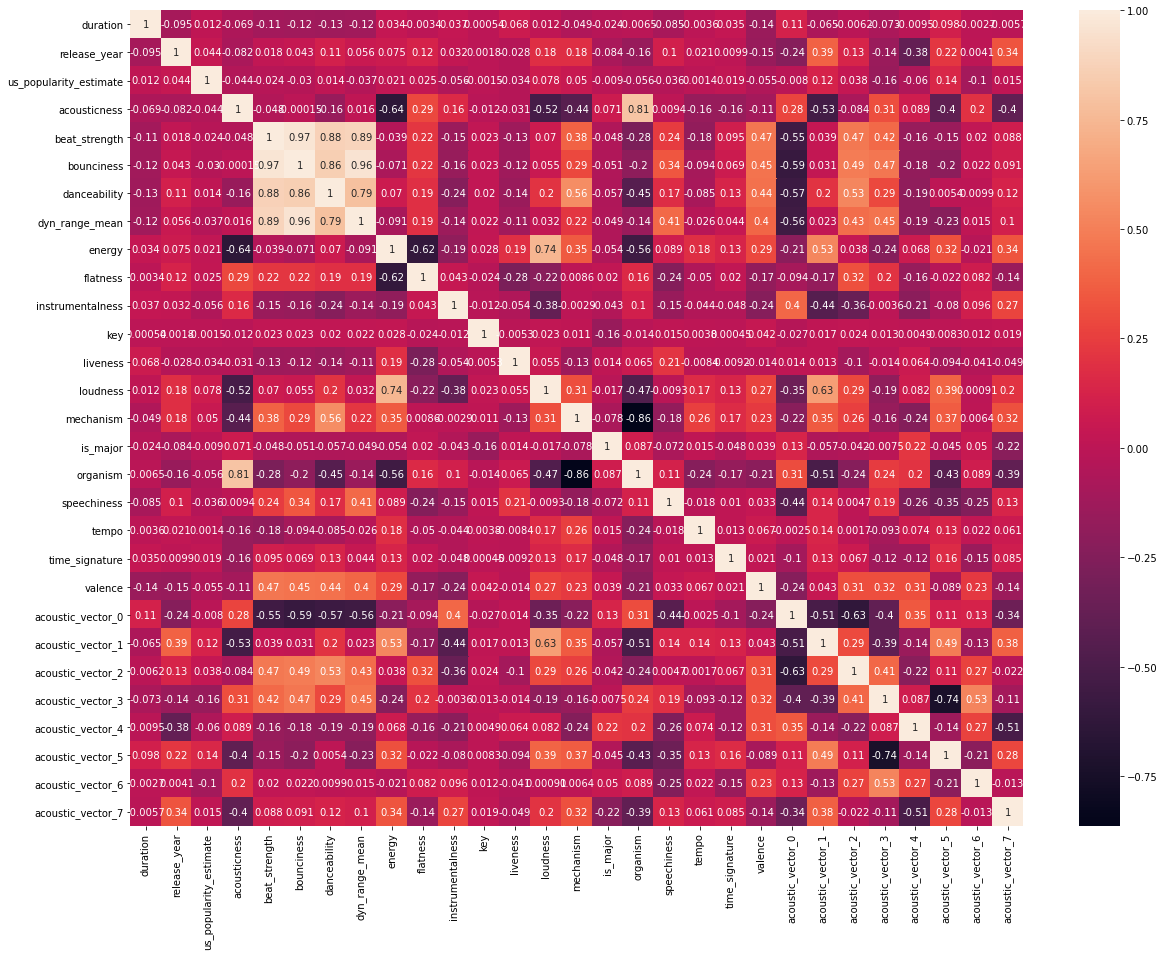

In [38]:
plt.figure(figsize=(20,15))
sns.heatmap(tf.corr(), annot=True);

In [39]:
# Merge track and Training Data

In [40]:
track.shape

(633404, 30)

In [41]:
df.shape

(167880, 17)

In [42]:
df.rename(columns={'track_id_clean': 'track_id'}, inplace=True)

In [43]:
dummy_train.head(2)

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,...,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1,16.0,...,0,1,0,0,0,0,0,0,0,1
1,2.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1,16.0,...,0,1,0,0,0,0,0,0,0,1


In [44]:
dummy_train.shape

(167880, 34)

In [45]:
#Train Test Split

In [46]:
X = dummy_train.drop(columns=["skip"])
y = dummy_train.skip
X_resampled, Y_resampled = SMOTE(sampling_strategy=1.0, random_state=2).fit_sample(X, y)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

In [48]:
#Standards for Data

In [49]:
scaler = StandardScaler()
sX_train = scaler.fit_transform(X_train)
sX_val = scaler.transform(X_val)
sX_test = scaler.transform(X_test)

# Applying Logistic Regression
log = LogisticRegressionCV( cv=3).fit(sX_train,y_train)
print("Log Train score: %s" % log.score(sX_train,y_train))
print("Log Val score:   %s" % log.score(sX_val,y_val))
print("Log Test score:  %s" % log.score(sX_test,y_test))

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

Log Train score: 0.9905339230157513
Log Val score:   0.9891459025084405
Log Test score:  0.9894863724636711


In [50]:
#Random Forest

In [51]:
rfc = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
print("RFC Train score: %s" % rfc.score(X_train,y_train))
print("RFC Val score:   %s" % rfc.score(X_val,y_val))
print("RFC Test score:  %s" % rfc.score(X_test,y_test))

RFC Train score: 0.997656151903679
RFC Val score:   0.9894528307151427
RFC Test score:  0.989821201366102


In [52]:
#feature selection

In [53]:
from boruta import BorutaPy

In [54]:
rf = RandomForestClassifier(random_state=1, n_estimators=100, max_depth=5)
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(sX_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	27
Tentative: 	2
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	27
Tentative: 	2
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	27
Tentative: 	2
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	27
Tentative: 	2
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	27
Tentative: 	2
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	27
Tentative: 	2
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	27
Tentative: 	2
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	27
Tentative: 	2
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	28
Tentative: 	1
Rejected: 	4
I

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=152,
                                          random_state=<mtrand.RandomState object at 0x0000016580896C78>),
         n_estimators='auto',
         random_state=<mtrand.RandomState object at 0x0000016580896C78>,
         verbose=2)

In [55]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
print("Ranking: ",boruta_selector.ranking_)               # check ranking of features
print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True False  True False  True
  True False  True False  True  True  True  True  True]
Ranking:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 3 1 4 1 1 5 1 5 1 1 1 1 1]
No. of significant features:  28


In [56]:
selected_rf_features = pd.DataFrame({'Feature':list(X.columns),'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
0,session_position,1
30,hist_user_behavior_reason_end_logout,1
29,hist_user_behavior_reason_end_fwdbtn,1
28,hist_user_behavior_reason_end_endplay,1
26,hist_user_behavior_reason_end_backbtn,1
24,hist_user_behavior_reason_start_trackdone,1
23,hist_user_behavior_reason_start_remote,1
21,hist_user_behavior_reason_start_fwdbtn,1
19,hist_user_behavior_reason_start_clickrow,1
18,hist_user_behavior_reason_start_backbtn,1


In [57]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_val = boruta_selector.transform(np.array(X_val))
X_important_test = boruta_selector.transform(np.array(X_test))

In [58]:
#Creating model with important features 

In [59]:
rf_important = RandomForestClassifier(random_state=1, n_estimators=100, n_jobs = -1)
rf_important.fit(X_important_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=1)

In [60]:
print("RFC Train score: %s" % rf_important.score(X_important_train, y_train))
print("RFC Val score:   %s" % rf_important.score(X_important_val, y_val))
print("RFC Test score:  %s" % rf_important.score(X_important_test, y_test))

RFC Train score: 0.997656151903679
RFC Val score:   0.9897039537933536
RFC Test score:  0.9899104890734168


In [61]:
#Apply XGBoost

In [62]:
xg = xgb.XGBClassifier()
xg.fit(X_important_train, y_train, eval_set=[(X_important_train, y_train),(X_important_val, y_val)], early_stopping_rounds=10, verbose=True)

C:\Users\Alex\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:14:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.44549	validation_1-logloss:0.44634
[1]	validation_0-logloss:0.30877	validation_1-logloss:0.31051
[2]	validation_0-logloss:0.22332	validation_1-logloss:0.22567
[3]	validation_0-logloss:0.16660	validation_1-logloss:0.16959
[4]	validation_0-logloss:0.12762	validation_1-logloss:0.13122
[5]	validation_0-logloss:0.10051	validation_1-logloss:0.10462
[6]	validation_0-logloss:0.08143	validation_1-logloss:0.08604
[7]	validation_0-logloss:0.06796	validation_1-logloss:0.07306
[8]	validation_0-logloss:0.05832	validation_1-logloss:0.06392
[9]	validation_0-logloss:0.05156	validation_1-logloss:0.05761
[10]	validation_0-logloss:0.04680	validation_1-logloss:0.05322
[11]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
print("XGB Train score: %s" % xg.score(X_important_train,y_train))
print("XGB Val score:   %s" % xg.score(X_important_val,y_val))
print("XGB Test score:  %s" % xg.score(X_important_test,y_test))

XGB Train score: 0.9932823639382229
XGB Val score:   0.9902899076425123
XGB Test score:  0.9911828389026541


In [64]:
#Train and test data

In [65]:
ts1 = pd.read_csv('test_data.csv')
ts2 = pd.read_csv('test_data_20.csv')
test_set = pd.concat([ts1,ts2])
test_set.shape

(202371, 40)

In [66]:
test_set.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,63_0008bbc4-6368-4bf2-83d8-d7f5bf8e0df3,0.000000,0.5,t_c7703c28-9da6-41f3-89b7-1a86ff1ee6be,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,63_0008bbc4-6368-4bf2-83d8-d7f5bf8e0df3,0.052632,0.5,t_c7703c28-9da6-41f3-89b7-1a86ff1ee6be,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2,63_0008bbc4-6368-4bf2-83d8-d7f5bf8e0df3,0.105263,0.5,t_e2ec05fe-96df-4aae-99a6-de4bf6f044e3,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
3,63_0008bbc4-6368-4bf2-83d8-d7f5bf8e0df3,0.157895,0.5,t_d949091d-2a42-4911-a821-45f529f06ec3,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
4,63_0008bbc4-6368-4bf2-83d8-d7f5bf8e0df3,0.210526,0.5,t_30016fc0-32c3-4f37-a30e-0f6d9e57b84e,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1


In [67]:
test_set['skip'] =  test_set['not_skipped'].replace({ 0 : 1, 1 : 0 })
y_test_data = test_set.skip

In [68]:
t1 = test_set.drop(['skip_1','skip_2','skip', 'skip_3',	'not_skipped', 'session_id', 'track_id_clean','hist_user_behavior_reason_end_appload'], axis=1)
t1.shape

(202371, 33)

In [69]:
#Load Validation data

In [70]:
vs1 = pd.read_csv('val_data.csv')
vs2 = pd.read_csv('val_data_20.csv')
val_set = pd.concat([vs1,vs2])
val_set.shape

(203816, 40)

In [71]:
val_set['skip'] =  val_set['not_skipped'].replace({ 0 : 1, 1 : 0 })
y_val_data = val_set.skip

In [72]:
v1 = val_set.drop(['skip_1','skip_2','skip', 'skip_3',	'not_skipped', 'session_id', 'track_id_clean', 'hist_user_behavior_reason_end_appload'],axis=1)
v1.shape

(203816, 33)

In [73]:
#train, Test and Validation dataset

In [74]:
X_val_set = boruta_selector.transform(np.array(v1))
X_test_set = boruta_selector.transform(np.array(t1))

In [75]:
#test score data

In [76]:
print("XGB Val score:   %s" % xg.score(X_val_set, y_val_data))
print("XGB Test score:  %s" % xg.score(X_test_set, y_test_data))

XGB Val score:   0.9834458531224242
XGB Test score:  0.9831892909557199


In [77]:
print("RF Val score:   %s" % rf_important.score(X_val_set, y_val_data))
print("RF Test score:  %s" % rf_important.score(X_test_set, y_test_data))

RF Val score:   0.9892991718020175
RF Test score:  0.9892375883896408


In [78]:
#Scaling Data

In [79]:
scaler = StandardScaler()
sX_train = scaler.fit_transform(X_train)
sX_val = scaler.transform(X_val)
sX_test = scaler.transform(X_test)


# Applying Logistic Regression
log = LogisticRegressionCV(cv=3).fit(sX_train,y_train)

print("Log Train score: %s" % log.score(sX_train,y_train))
print("Log Val score:   %s" % log.score(sX_val,y_val))
print("Log Test score:  %s" % log.score(sX_test,y_test))

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

Log Train score: 0.9905339230157513
Log Val score:   0.9891459025084405
Log Test score:  0.9894863724636711


In [80]:
#Apply Random forest Classifier

In [81]:
rfc = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
print("RFC Train score: %s" % rfc.score(X_train,y_train))
print("RFC Val score:   %s" % rfc.score(X_val,y_val))
print("RFC Test score:  %s" % rfc.score(X_test,y_test))

RFC Train score: 0.9976701033804428
RFC Val score:   0.9894528307151427
RFC Test score:  0.9899551329270743


In [82]:
#Feature selction using Boruta

In [ ]:
rf = RandomForestClassifier(random_state=1, n_estimators=100, max_depth=5)
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(sX_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	27
Tentative: 	2
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	27
Tentative: 	2
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	27
Tentative: 	2
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	27
Tentative: 	2
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	27
Tentative: 	2
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	27
Tentative: 	2
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	27
Tentative: 	2
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	27
Tentative: 	2
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	28
Tentative: 	1
Rejected: 	4
I

In [ ]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
print("Ranking: ",boruta_selector.ranking_)               # check ranking of features
print("No. of significant features: ", boruta_selector.n_features_)

In [ ]:
selected_rf_features = pd.DataFrame({'Feature':list(X.columns),'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

In [ ]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_val = boruta_selector.transform(np.array(X_val))
X_important_test = boruta_selector.transform(np.array(X_test))

In [ ]:
#Random Forest

In [ ]:
rf_important = RandomForestClassifier(random_state=1, n_estimators=100, n_jobs = -1)
rf_important.fit(X_important_train, y_train)

In [ ]:
print("RFC Train score: %s" % rf_important.score(X_important_train, y_train))
print("RFC Val score:   %s" % rf_important.score(X_important_val, y_val))
print("RFC Test score:  %s" % rf_important.score(X_important_test, y_test))

In [ ]:
#LGBM

In [ ]:
lgbm = LGBMClassifier( ).fit( X_important_train, y_train,
       eval_set=[(X_important_train, y_train),(X_important_val, y_val)],
       early_stopping_rounds=10, verbose=True)

print()
print("LGBM Train score: %s" % lgbm.score(X_important_train,y_train))
print("LGBM Val score:   %s" % lgbm.score(X_important_val,y_val))

In [ ]:
########################################